# What is an AutoRegressive model?
An auto-regressive model is a simple model that predicts future performance based on past performance.
An AR model is a Linear Regression model that uses lagged variables as input(predictors). <br>
Int he concept of time series forecasting, autoregressive modeling will mean creating the model where the response variable *Y* will depend upon the *previous values of Y* at a predetermined *constant time lag*. The time lag can be daily (or 2,3,4 ..days), weekly, monthly etc.

The equation for the AR model:

![Alt text](image-14.png)

Where: <br>
p - past values <br>
Yt - Function of different past values <br>
Ert - errors in time <br>
C - intercept


## Alternative Methods to AR Models
Here are some of the alternative time-series forecasting methods to the AR modeling technique: <br>
- MA (Moving Average) <br>
- ARMA (Autoregressive Moving Average) <br>
- ARIMA (Autoregressive Integrated Moving Average) <br>
- SARIMA (Seasonal Autoregressive Integrated Moving Average) <br>
- VAR (Vector Autoregression) <br>
- VARMA (Vector Autoregression Moving Average) <br>
- SES (Simple Exponential Smoothing) <br>

## Example: AR Model
The following are some of the key steps in training an AR model: <br>
- Plot the time-series <br>
- Check the stationarity <br>
- Determine the parameter *p* or order of the AR model <br>
- Train the model <br>

#### Step 1: Plot the time series

In [17]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [18]:
#Loading the data
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

In [19]:
#Display 
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Text(0.5, 1.0, 'Time Series Plot of the Electricity Consumption')

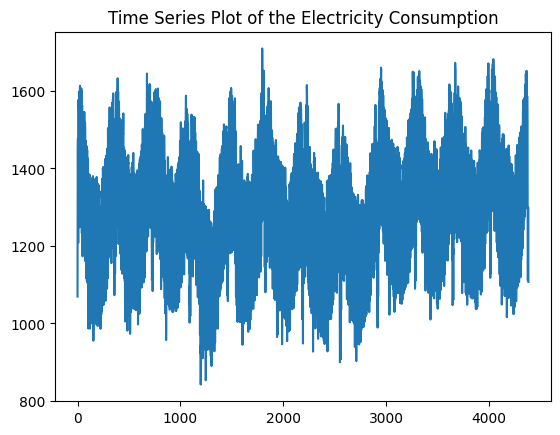

In [20]:
df['Consumption'].plot()
plt.title('Time Series Plot of the Electricity Consumption')

#### step 2 & 3: Check stationarity and order of the time-series data

- *Stationarity of the time-series data* <br>
The stationarity of the data can be found using adfuller (ADF) class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.<br><br>

- *Order of AR model to be trained*<br> 
The order of AR model is determined by checking the partial autocorrelation plot. The plot_pacf method of statsmodels.graphics.tsaplots is used to plot. <br>

In [21]:
# Check for stationarity of the time-series data
from statsmodels.tsa.stattools import adfuller

#Running the test
stationarityTest = adfuller(df['Consumption'], autolag = 'AIC')

#Checking the p-value
print('P-value: ', stationarityTest[1])

P-value:  4.744054901842209e-08


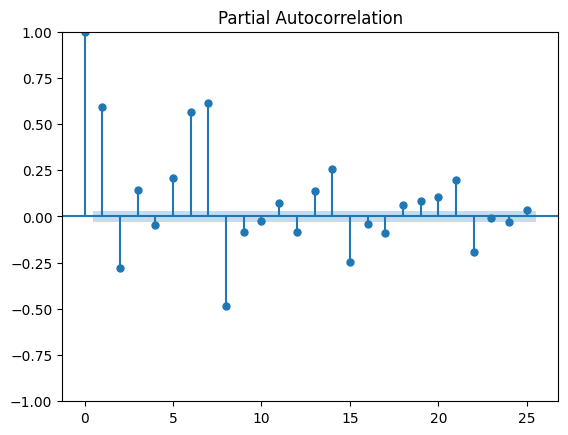

In [22]:
#Find the order of the AR model to be trained (Plot Partial AutoCorrelation)
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags = 25)

The Partical Autocorrelation Plot can be used to determine the order of the AR model. You may note that a correlation value up to order 8 is high enough. Thus, we will train the AR model of order 8 <br>

##### *Code Explanation*
The code is using the '*statsmodel*' library to plot the Partial Autocorrelation function (PACF) of the Consumption data in a pandas dataframe (df['Consumption']). <br>
The PACF is a useful tool in TSA to determine the correlation between a time series data point and its lagged values while controlling the influence of intermediate time points. <br>

The '*plot_pacf*' function generates a PACF plot of the Consumption data up to 25 lags.<br>

##### *Interpreting the PACF plot* 
In order to determine the lag from the PACF generated above, we need to look for significant spikes or 'peaks' in the plot. These spikes indicate the correlation between the consumption data and different lags.

##### *Steps for detemining the order of the lag for an AR model using PACF*:<br>
1. Look for significant spikes in the PACF plot that extend beyond the shaded region (usually 95% confidence interval[CI]) on the plot. <br>
2. The order of the lag for the AR model is typically equal to the last lag where PACF value crosses the CI.

##### *PACF Plot Analysis and Conclusion*
In or plot, we see a significant spike at lag 1 but it is ouside the confidence interval, while all other spikes are within the interval, then we can look at the most significant spike within the CI, which happens to be at lag 8, thus the order of our AR model would be 8.

##### *Side Note*
Determing the appropriate order lag is not always straightfowrd and may need use of additional statistical tests or domain knowledge to confirm the best order for the specific data. Additionally, the interpretation of the PACF plot may vary depending on the characteristics of the time series data.

#### Step 4: Train the AR Model

In [34]:
#Split data into test and train sets
train = df['Consumption'].iloc[:-100]
test = df['Consumption'].iloc[-100]

#Fit Model
AR_model = AutoReg(train, lags =8).fit()

#Print summary
print(AR_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Thu, 20 Jul 2023   AIC                          48483.625
Time:                        09:03:36   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

#### Step 5: Make Predictions

In [35]:
prediction = AR_model.predict(start =len(train), end =len(df)-1, dynamic = False)

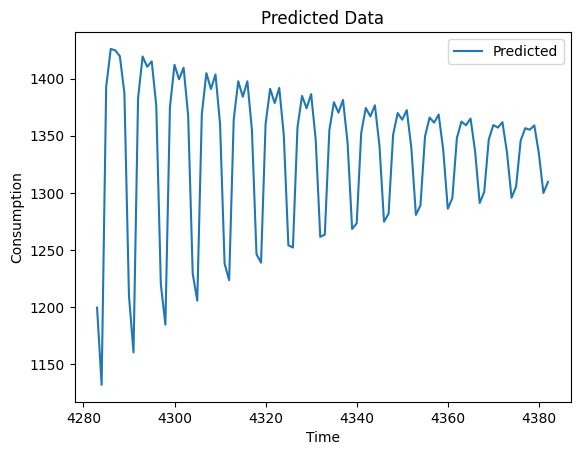

In [36]:
#Plot the predicted data
plt.plot(prediction, label ='Predicted')

# Add labels and legend to the plot
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Predicted Data')
plt.legend()


# Display the plot
plt.show()

# Autoregressive Model vs Moving Average
An AR model isa method of future prediction based on past information while MA analyzes data by calculating a series of averages from a large dataset.

![Alt text](image-15.png)